## Semester 1 Project Submission

Please fill out:
* Student name: EJ Donelson
* Instructor name: Abhineet


In [346]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline
import scipy.stats as stats
from math import sqrt

In [347]:
bom = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/capstone-pod-7/data/zippedData/bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [348]:
rt_movie = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/capstone-pod-7/data/zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [349]:
rt_movie['theater_date']

0        Oct 9, 1971
1       Aug 17, 2012
2       Sep 13, 1996
3        Dec 9, 1994
4                NaN
            ...     
1555    Aug 18, 2006
1556    Jul 23, 1993
1557     Jan 1, 1962
1558     Apr 1, 1993
1559    Sep 27, 2001
Name: theater_date, Length: 1560, dtype: object

In [350]:
rt_reviews = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/capstone-pod-7/data/zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [351]:
len(rt_reviews['id'].unique())

1135

In [352]:
tmdb = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/capstone-pod-7/data/zippedData/tmdb.movies.csv.gz")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [353]:
tmdb['popularity'].max()

80.773

In [354]:
tn_budgets = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/capstone-pod-7/data/zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [355]:
conn = sqlite3.connect('C:/Users/edonelson/Documents/Flatiron/capstone-pod-7/data/zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [356]:
pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [357]:
director_df = pd.read_sql("""
SELECT DISTINCT(mb.primary_title), mb.start_year, mb.runtime_minutes, p.primary_name
FROM movie_basics AS mb
INNER JOIN directors AS d
  ON mb.movie_id = d.movie_id
INNER JOIN persons AS p
  ON p.person_id = d.person_id
;""", conn)

In [358]:
director_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163174 entries, 0 to 163173
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    163174 non-null  object 
 1   start_year       163174 non-null  int64  
 2   runtime_minutes  130626 non-null  float64
 3   primary_name     163174 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [359]:
director_df.head()

,primary_title,start_year,runtime_minutes,primary_name
0,Sunghursh,2013,175.0,Harnam Singh Rawail
1,One Day Before the Rainy Season,2019,114.0,Mani Kaul
2,The Other Side of the Wind,2018,122.0,Orson Welles
3,Sabse Bada Sukh,2018,NaN,Hrishikesh Mukherjee
4,The Wandering Soap Opera,2017,80.0,Raoul Ruiz


In [360]:
pd.read_sql("""
SELECT *
FROM directors
;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [361]:
pd.read_sql("""
SELECT *
FROM known_for
;""", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [362]:
pd.read_sql("""
SELECT *
FROM movie_akas
;""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [363]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [364]:
pd.read_sql("""
SELECT *
FROM persons
;""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [365]:
pd.read_sql("""
SELECT *
FROM principals
;""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [366]:
pd.read_sql("""
SELECT *
FROM writers
;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [367]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [368]:
bom['foreign_gross']= bom['foreign_gross'].str.replace(',','')

In [369]:
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

In [370]:
bom = bom.astype({'foreign_gross': float})

In [371]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [372]:
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)

In [373]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [374]:
bom = bom[bom['studio'].notna()]

In [375]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [376]:
bom.describe()

,domestic_gross,foreign_gross,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.855030e+07,4.505716e+07,2013.959787
std,6.679610e+07,1.127504e+08,2.477735
min,0.000000e+00,0.000000e+00,2010.000000
25%,1.120000e+05,0.000000e+00,2012.000000
50%,1.300000e+06,1.450000e+06,2014.000000
75%,2.767500e+07,2.917500e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [377]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [378]:
###drop currency and box office and studio columns??

In [379]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [380]:
rt_reviews = rt_reviews[rt_reviews['rating'].notna()]

In [381]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40915 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          40915 non-null  int64 
 1   review      35379 non-null  object
 2   rating      40915 non-null  object
 3   fresh       40915 non-null  object
 4   critic      38935 non-null  object
 5   top_critic  40915 non-null  int64 
 6   publisher   40688 non-null  object
 7   date        40915 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [382]:
rt_reviews = rt_reviews[rt_reviews['review'].notna()]

In [383]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          35379 non-null  int64 
 1   review      35379 non-null  object
 2   rating      35379 non-null  object
 3   fresh       35379 non-null  object
 4   critic      34189 non-null  object
 5   top_critic  35379 non-null  int64 
 6   publisher   35152 non-null  object
 7   date        35379 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [384]:
rt_reviews = rt_reviews[rt_reviews['critic'].notna()]

In [385]:
rt_reviews = rt_reviews[rt_reviews['publisher'].notna()]

In [386]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [387]:
rt_reviews['top_critic'].unique()

array([0, 1], dtype=int64)

In [388]:
rt_reviews['rating'].value_counts()

3/4      3267
3/5      2971
4/5      2800
2/4      2442
2.5/4    2156
         ... 
1-5         1
9.0         1
1.8         1
7.9         1
9.2         1
Name: rating, Length: 182, dtype: int64

In [389]:
### clean rating column. ratings are out of 4, 5, 10, etc. Some have decimals, some shows /'s
### need to standardize ratings and turn to integers/floats

In [390]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [391]:
tmdb['popularity'].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

In [392]:
tmdb['popularity'].max()

80.773

In [393]:
tmdb['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
cr        1
cy        1
xh        1
bo        1
kk        1
Name: original_language, Length: 76, dtype: int64

In [394]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

In [395]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [396]:
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

In [397]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')

In [398]:
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})

In [399]:
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')

In [400]:
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})

In [401]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')

In [402]:
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})

In [403]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [404]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


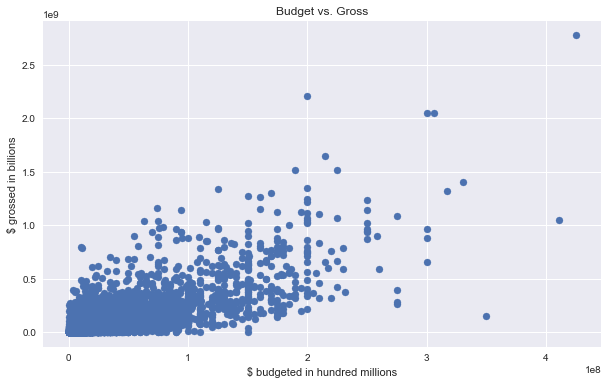

In [405]:
x = tn_budgets['production_budget']
y =tn_budgets['worldwide_gross']
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('$ budgeted in hundred millions')
plt.ylabel('$ grossed in billions')
plt.title('Budget vs. Gross');

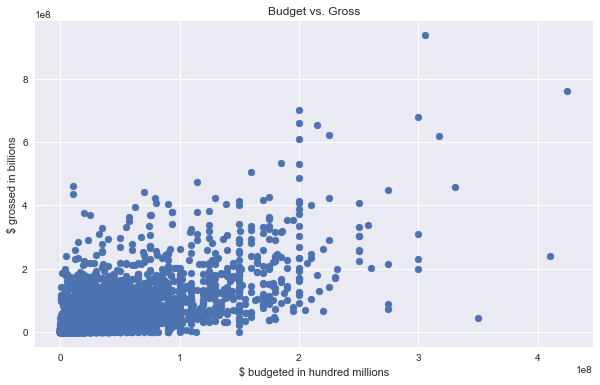

In [406]:
x = tn_budgets['production_budget']
y =tn_budgets['domestic_gross']
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('$ budgeted in hundred millions')
plt.ylabel('$ grossed in billions')
plt.title('Budget vs. Gross');

In [407]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [408]:
rt_movie['genre'] = rt_movie['genre'].str.replace("|"," ")

In [409]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure Classics Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [410]:
rt_movie['genre'] = rt_movie['genre'].str.replace("and ", "")

In [411]:
rt_movie = rt_movie.astype({'genre': 'str'})

In [412]:
rt_movie['genre'] = rt_movie['genre'].apply(lambda x: x.split(" "))

In [413]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science, Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical, Performing, Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery, Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [414]:
type(rt_movie['genre'][0])

list

In [415]:
unique_list = []
for lst in rt_movie['genre']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Action', 'Adventure', 'Classics', 'Drama', 'Science', 'Fiction', 'Fantasy', 'Musical', 'Performing', 'Arts', 'Mystery', 'Suspense', 'Romance', 'Kids', 'Family', 'Comedy', 'nan', 'Documentary', 'Special', 'Interest', 'Art', 'House', 'International', 'Horror', 'Western', 'Television', 'Sports', 'Fitness', 'Animation', 'Faith', 'Spirituality', 'Cult', 'Movies', 'Anime', 'Manga', 'Gay', 'Lesbian']


In [416]:
for lst in rt_movie['genre']:
    for element in lst:
        if element == 'nan':
            lst.remove('nan')
        else:
            continue

In [417]:
unique_list = []
for lst in rt_movie['genre']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Action', 'Adventure', 'Classics', 'Drama', 'Science', 'Fiction', 'Fantasy', 'Musical', 'Performing', 'Arts', 'Mystery', 'Suspense', 'Romance', 'Kids', 'Family', 'Comedy', 'Documentary', 'Special', 'Interest', 'Art', 'House', 'International', 'Horror', 'Western', 'Television', 'Sports', 'Fitness', 'Animation', 'Faith', 'Spirituality', 'Cult', 'Movies', 'Anime', 'Manga', 'Gay', 'Lesbian']


In [418]:
for lst in rt_movie['genre']:
    for element in lst:
        if element == 'Arts':
            lst.remove('Arts')
        else:
            continue

In [419]:
for lst in rt_movie['genre']:
    for i in range(len(lst)):
            if lst[i] == 'Performing':
                lst[i] = 'Performing Arts'
            else:
                continue

In [420]:
unique_list = []
for lst in rt_movie['genre']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Action', 'Adventure', 'Classics', 'Drama', 'Science', 'Fiction', 'Fantasy', 'Musical', 'Performing Arts', 'Mystery', 'Suspense', 'Romance', 'Kids', 'Family', 'Comedy', 'Documentary', 'Special', 'Interest', 'Art', 'House', 'International', 'Horror', 'Western', 'Television', 'Sports', 'Fitness', 'Animation', 'Faith', 'Spirituality', 'Cult', 'Movies', 'Anime', 'Manga', 'Gay', 'Lesbian']


In [421]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science, Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical, Performing Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery, Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [422]:
rt_movie['runtime'] = rt_movie['runtime'].str.replace(" minutes", "")

In [423]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science, Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical, Performing Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery, Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


In [424]:
director_df = director_df[director_df['runtime_minutes'].notna()]

In [425]:
director_df['runtime_minutes'] = director_df['runtime_minutes'].replace(".0", "")

In [426]:
rt_movie = rt_movie[rt_movie['runtime'].notna()]

In [427]:
rt_movie = rt_movie.astype({'runtime': 'int64'})

In [428]:
merged = pd.merge(rt_movie, director_df, left_on=['director', 'runtime'], right_on=['primary_name', 'runtime_minutes'])

In [429]:
merged

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,primary_title,start_year,runtime_minutes,primary_name
0,14,"""Love Ranch"" is a bittersweet love story that ...",R,[Drama],Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117,NaN,Love Ranch,2010,117.0,Taylor Hackford
1,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery, Suspense]",George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108,ATO Pictures,Casino Jack,2010,108.0,George Hickenlooper
2,66,"Niels Arden Oplev, the acclaimed director of t...",R,"[Mystery, Suspense]",Niels Arden Oplev,NaN,"Mar 8, 2013","Jul 9, 2013",$,"10,880,926",118,FilmDistrict,Dead Man Down,2013,118.0,Niels Arden Oplev
3,102,"Aging, small town attorney Mac McClain (Matthe...",PG-13,"[Drama, Mystery, Suspense]",Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...,NaN,NaN,NaN,NaN,101,Fox,The Trial,2010,101.0,Gary Wheeler
4,106,Three dope-smoking ex-convicts live among frie...,R,[Comedy],Mike Clattenburg,Mike Clattenburg|Robb Wells,"Jun 6, 2006","Apr 22, 2008",NaN,NaN,95,Screen Media Films,Moving Day,2012,95.0,Mike Clattenburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1819,"In the year 2045, people can escape their hars...",PG-13,"[Action, Adventure, Science, Fiction, Fantasy]",Steven Spielberg,Zak Penn|Ernest Cline,"Mar 29, 2018","Jul 3, 2018",NaN,NaN,140,Warner Bros. Pictures,Ready Player One,2018,140.0,Steven Spielberg
132,1864,Four friends stumble into a deal too good to r...,NR,[Drama],Jackie Earle Haley,Robert Lowell,"Nov 20, 2015","Feb 16, 2016",NaN,NaN,94,NaN,Criminal Activities,2015,94.0,Jackie Earle Haley
133,1901,When charismatic terrorist Adam Qasim escapes ...,R,"[Action, Adventure, Art, House, International,...",Bharat Nalluri,Samuel Vincent|Jonathan Brackley|Sam Vincent,"Dec 4, 2015","Feb 9, 2016",NaN,NaN,104,NaN,MI-5,2015,104.0,Bharat Nalluri
134,1901,When charismatic terrorist Adam Qasim escapes ...,R,"[Action, Adventure, Art, House, International,...",Bharat Nalluri,Samuel Vincent|Jonathan Brackley|Sam Vincent,"Dec 4, 2015","Feb 9, 2016",NaN,NaN,104,NaN,The Man Who Invented Christmas,2017,104.0,Bharat Nalluri


In [430]:
merged['theater_date'] = pd.to_datetime(merged['theater_date'])

In [431]:
merged['Year'] = merged['theater_date'].dt.year

In [432]:
merged = merged[merged['Year'].notna()]

In [433]:
merged = merged.astype({'Year': 'int64'})

In [434]:
merged.drop(index=merged[(merged.Year != merged.start_year )].index)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,primary_title,start_year,runtime_minutes,primary_name,Year
0,14,"""Love Ranch"" is a bittersweet love story that ...",R,[Drama],Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,"134,904",117,NaN,Love Ranch,2010,117.0,Taylor Hackford,2010
1,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery, Suspense]",George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,"1,039,869",108,ATO Pictures,Casino Jack,2010,108.0,George Hickenlooper,2010
2,66,"Niels Arden Oplev, the acclaimed director of t...",R,"[Mystery, Suspense]",Niels Arden Oplev,NaN,2013-03-08,"Jul 9, 2013",$,"10,880,926",118,FilmDistrict,Dead Man Down,2013,118.0,Niels Arden Oplev,2013
8,188,From the producers of Little Miss Sunshine - W...,R,"[Comedy, Drama]",Colin Trevorrow,Derek Connolly,2012-06-08,"Oct 30, 2012",$,"4,007,792",86,Film District,Safety Not Guaranteed,2012,86.0,Colin Trevorrow,2012
11,251,"In this adaptation of the novel ""The Price of ...",R,"[Drama, Romance]",Todd Haynes,Phyllis Nagy,2015-11-20,"Mar 15, 2016",$,"8,518,148",118,The Weinstein Company,Carol,2015,118.0,Todd Haynes,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1762,Adapted from the bestselling novel by author J...,PG-13,[Drama],Jake Schreier,NaN,2015-07-24,"Oct 20, 2015",NaN,NaN,109,20th Century Fox,Paper Towns,2015,109.0,Jake Schreier,2015
131,1819,"In the year 2045, people can escape their hars...",PG-13,"[Action, Adventure, Science, Fiction, Fantasy]",Steven Spielberg,Zak Penn|Ernest Cline,2018-03-29,"Jul 3, 2018",NaN,NaN,140,Warner Bros. Pictures,Ready Player One,2018,140.0,Steven Spielberg,2018
132,1864,Four friends stumble into a deal too good to r...,NR,[Drama],Jackie Earle Haley,Robert Lowell,2015-11-20,"Feb 16, 2016",NaN,NaN,94,NaN,Criminal Activities,2015,94.0,Jackie Earle Haley,2015
133,1901,When charismatic terrorist Adam Qasim escapes ...,R,"[Action, Adventure, Art, House, International,...",Bharat Nalluri,Samuel Vincent|Jonathan Brackley|Sam Vincent,2015-12-04,"Feb 9, 2016",NaN,NaN,104,NaN,MI-5,2015,104.0,Bharat Nalluri,2015


In [435]:
final = pd.merge(merged, tn_budgets, left_on=['primary_title'], right_on=['movie'])

In [436]:
final.head()

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,start_year,runtime_minutes,primary_name,Year,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,14,"""Love Ranch"" is a bittersweet love story that ...",R,[Drama],Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,"134,904",...,2010,117.0,Taylor Hackford,2010,19,2010-06-30,Love Ranch,25000000,137885,146149
1,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery, Suspense]",George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,"1,039,869",...,2010,108.0,George Hickenlooper,2010,32,2010-12-17,Casino Jack,12500000,2039869,2272186
2,66,"Niels Arden Oplev, the acclaimed director of t...",R,"[Mystery, Suspense]",Niels Arden Oplev,NaN,2013-03-08,"Jul 9, 2013",$,"10,880,926",...,2013,118.0,Niels Arden Oplev,2013,78,2013-03-08,Dead Man Down,30000000,10895295,19599974
3,158,The film tells the inspiring true story of how...,PG-13,"[Drama, Sports, Fitness]",Clint Eastwood,Anthony Peckham,2009-12-11,"May 18, 2010",$,"37,431,431",...,2014,134.0,Clint Eastwood,2009,43,2014-06-20,Jersey Boys,40000000,47047013,65282732
4,188,From the producers of Little Miss Sunshine - W...,R,"[Comedy, Drama]",Colin Trevorrow,Derek Connolly,2012-06-08,"Oct 30, 2012",$,"4,007,792",...,2012,86.0,Colin Trevorrow,2012,77,2012-06-08,Safety Not Guaranteed,750000,4010957,4422318


In [437]:
genre_df = pd.merge(tmdb, tn_budgets, left_on=['title'], right_on=['movie'])

In [438]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2385 non-null   int64         
 1   genre_ids          2385 non-null   object        
 2   id_x               2385 non-null   int64         
 3   original_language  2385 non-null   object        
 4   original_title     2385 non-null   object        
 5   popularity         2385 non-null   float64       
 6   release_date_x     2385 non-null   datetime64[ns]
 7   title              2385 non-null   object        
 8   vote_average       2385 non-null   float64       
 9   vote_count         2385 non-null   int64         
 10  id_y               2385 non-null   int64         
 11  release_date_y     2385 non-null   datetime64[ns]
 12  movie              2385 non-null   object        
 13  production_budget  2385 non-null   int64         
 14  domestic

In [439]:
genre_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642


In [440]:
genre_df = genre_df[genre_df['title'] != 'Home']

In [441]:
genre_df = genre_df.drop_duplicates(subset='title')

In [442]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25825,"[28, 878]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,81,1999-10-22,Molly,21000000,17396,17396
2377,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760
2382,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318


In [443]:
genre_df['Net Revenue'] = genre_df['worldwide_gross'] - genre_df['production_budget']

In [444]:
genre_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874


In [445]:
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace("[", "")

In [446]:
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace("]", "")

In [447]:
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace(",", "")

In [448]:
genre_df['genre_ids'][0][0]

'1'

In [449]:
genre_df['genre_ids'] = genre_df['genre_ids'].apply(lambda x: x.split(" "))

In [450]:
genre_df['genre_ids'][0]

['14', '12', '16', '10751']

In [451]:
for lst in genre_df['genre_ids']:
    for i in range(len(lst)):
            if lst[i] == '12':
                lst[i] = 'Adventure'
            elif lst[i] == '14':
                lst[i] = 'Fantasy'
            elif lst[i] == '28':
                lst[i] = 'Action'
            elif lst[i] == '16':
                lst[i] = 'Animation'
            elif lst[i] == '35':
                lst[i] = 'Comedy'
            elif lst[i] == '80':
                lst[i] = 'Crime'
            elif lst[i] == '99':
                lst[i] = 'Documentary'
            elif lst[i] == '18':
                lst[i] = 'Drama'
            elif lst[i] == '10751':
                lst[i] = 'Family'
            elif lst[i] == '36':
                lst[i] = 'History'
            elif lst[i] == '27':
                lst[i] = 'Horror'
            elif lst[i] == '10402':
                lst[i] = 'Music'
            elif lst[i] == '9648':
                lst[i] = 'Mystery'
            elif lst[i] == '10749':
                lst[i] = 'Romance'
            elif lst[i] == '878':
                lst[i] = 'SciFi'
            elif lst[i] == '10770':
                lst[i] = 'TV Movie'
            elif lst[i] == '53':
                lst[i] = 'Thriller'
            elif lst[i] == '10752':
                lst[i] = 'War'
            elif lst[i] == '37':
                lst[i] = 'Western'

In [452]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[Adventure, Action, SciFi]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[Action, SciFi, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25825,"[Action, SciFi]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,81,1999-10-22,Molly,21000000,17396,17396,-20982604
2377,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


In [453]:
genre_df.sample(10)

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
396,2558,"[Horror, SciFi, Mystery, Thriller]",60935,en,The Thing,12.349,2011-10-14,The Thing,6.1,1404,77,2011-10-14,The Thing,38000000,16999934,27573078,-10426922
628,3746,"[Thriller, Horror]",140781,en,Daylight,1.400,2011-07-17,Daylight,4.2,3,95,1996-12-06,Daylight,80000000,32908290,158908290,78908290
1306,11102,"[Crime, Drama]",157845,en,The Rover,13.528,2014-07-18,The Rover,6.2,435,47,2014-06-13,The Rover,8500000,1109199,3180252,-5319748
82,95,"[Comedy, Horror]",43593,en,Piranha 3D,11.302,2010-08-20,Piranha 3D,5.3,1029,52,2010-08-20,Piranha 3D,24000000,25003155,83660160,59660160
348,2501,"[Crime, Comedy, Action]",38322,en,"Big Mommas: Like Father, Like Son",16.024,2011-02-18,"Big Mommas: Like Father, Like Son",5.5,623,1,2011-02-18,"Big Mommas: Like Father, Like Son",32000000,37915414,82332450,50332450
1581,14228,"[SciFi, Action, Horror, Thriller, Adventure, F...",36648,en,Blade: Trinity,15.990,2004-12-08,Blade: Trinity,5.7,2058,100,2004-12-08,Blade: Trinity,65000000,52397389,131353165,66353165
2342,24038,"[Romance, Animation, Comedy, Family, Fantasy, ...",370567,en,Sherlock Gnomes,12.987,2018-03-23,Sherlock Gnomes,5.4,343,54,2018-03-23,Sherlock Gnomes,59000000,43242871,87527651,28527651
2119,20676,"[Crime, Horror, Mystery, Thriller]",298250,en,Jigsaw,17.398,2017-10-27,Jigsaw,6.1,1887,61,2017-10-27,Jigsaw,10000000,38052832,102445196,92445196
2162,20738,[Horror],14564,en,Rings,13.530,2017-02-03,Rings,4.9,1785,38,2017-02-03,Rings,25000000,27793018,82917283,57917283
1031,7986,"[Crime, Thriller]",158011,en,The Call,11.315,2013-03-14,The Call,6.7,1779,14,2013-03-15,The Call,12800000,51872378,69821476,57021476


In [454]:
unique_list = []
for lst in genre_df['genre_ids']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Fantasy', 'Adventure', 'Animation', 'Family', 'Action', 'SciFi', 'Comedy', 'Thriller', 'Drama', 'Romance', 'Mystery', 'Crime', 'History', 'Horror', 'Western', 'War', 'Documentary', 'Music', 'TV Movie', '']


In [455]:
type(genre_df['genre_ids'][1181][0])

str

In [456]:
count = 0
for lst in genre_df['genre_ids']:
    if lst == ['']:
        count += 1
    else:
        continue
print(count)

42


In [457]:
genre_df_exploded = genre_df.explode('genre_ids')

In [458]:
genre_df_exploded

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
0,1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
0,1,Animation,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
0,1,Family,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,Adventure,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,26040,,509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,Comedy,546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2382,26092,Animation,546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,,513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


In [459]:
genre_df_exploded = genre_df_exploded[genre_df_exploded['genre_ids'] != '']

In [460]:
average_group = genre_df_exploded.groupby(['genre_ids'])['Net Revenue'].mean().reset_index()
average_group

,genre_ids,Net Revenue
0,Action,1.589646e+08
1,Adventure,2.421081e+08
2,Animation,2.439302e+08
3,Comedy,8.484031e+07
4,Crime,6.079877e+07
5,Documentary,3.013668e+07
6,Drama,4.583196e+07
7,Family,1.920874e+08
8,Fantasy,2.058034e+08
9,History,3.560990e+07


<AxesSubplot:>

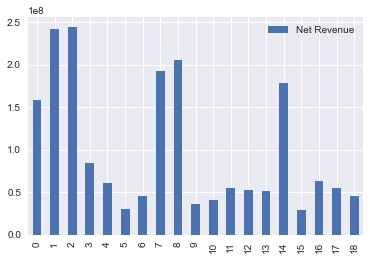

In [461]:
average_group.plot(kind='bar')

In [462]:
std_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].std()

In [463]:
std_group

genre_ids
Action         2.779470e+08
Adventure      3.242608e+08
Animation      2.894359e+08
Comedy         1.601675e+08
Crime          1.595117e+08
Documentary    1.062421e+08
Drama          1.117663e+08
Family         2.553847e+08
Fantasy        3.121838e+08
History        6.532625e+07
Horror         7.903925e+07
Music          1.391642e+08
Mystery        8.875318e+07
Romance        1.194984e+08
SciFi          2.982871e+08
TV Movie       6.634711e+07
Thriller       1.569945e+08
War            1.105129e+08
Western        1.171308e+08
Name: Net Revenue, dtype: float64

In [464]:
x_bar = average_group['Net Revenue'][1]
mu = genre_df['Net Revenue'].mean()
n = len(genre_df['Net Revenue'])
sigma = genre_df['Net Revenue'].std()
print(x_bar, mu, n, sigma)

242108079.2852349 81571004.87883516 1923 184177359.45262742


In [465]:
z = (x_bar - mu)/(sigma/np.sqrt(n))
z

38.223349734174626

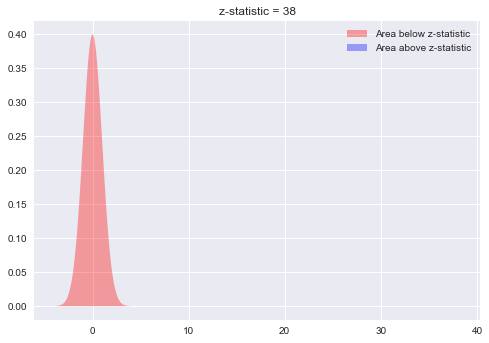

In [466]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,z,0.01),
                 y1= stats.norm.pdf(np.arange(-4,z,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(z,4,0.01), 
                 y1= stats.norm.pdf(np.arange(z,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 38');

In [467]:
median_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].median()
median_group

genre_ids
Action          50972756.0
Adventure      116199551.0
Animation      146271037.0
Comedy          21599671.5
Crime            8495213.0
Documentary      -100000.0
Drama            5415296.0
Family          78604221.0
Fantasy         86605663.0
History         12012507.5
Horror           8211609.0
Music            3657914.0
Mystery         12608019.0
Romance         10495204.0
SciFi           53461527.0
TV Movie        -1084958.0
Thriller        12215331.0
War              9238343.0
Western         -1882229.0
Name: Net Revenue, dtype: float64

In [468]:
count_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].count()
count_group

genre_ids
Action         472
Adventure      298
Animation      123
Comedy         584
Crime          241
Documentary     69
Drama          872
Family         187
Fantasy        178
History         70
Horror         258
Music           47
Mystery        139
Romance        233
SciFi          217
TV Movie        10
Thriller       518
War             47
Western         24
Name: Net Revenue, dtype: int64

In [469]:
genre_df_exploded[(genre_df_exploded['genre_ids'] == 'Documentary') & (genre_df_exploded['Net Revenue'] < 0)]

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
218,401,Documentary,43942,en,Freakonomics,5.705,2010-10-01,Freakonomics,6.6,57,80,2010-10-01,Freakonomics,2900000,101270,172867,-2727133
236,565,Documentary,72914,en,"Fat, Sick & Nearly Dead",3.356,2010-04-16,"Fat, Sick & Nearly Dead",7.2,69,10,2011-04-01,"Fat, Sick & Nearly Dead",2600000,0,0,-2600000
248,797,Documentary,40428,en,8: The Mormon Proposition,2.190,2010-01-01,8: The Mormon Proposition,6.2,11,38,2010-06-18,8: The Mormon Proposition,2500000,100280,100280,-2399720
552,2923,Documentary,84404,en,Bully,5.877,2011-04-23,Bully,7.2,93,79,2001-07-13,Bully,2100000,881824,1381824,-718176
582,3393,Documentary,123928,de,Gettysburg,2.176,2011-05-30,Gettysburg,5.5,5,86,1993-10-08,Gettysburg,25000000,10731997,10731997,-14268003
621,3606,Documentary,56761,en,Reagan,1.580,2011-02-07,Reagan,4.8,9,30,2019-12-31,Reagan,25000000,0,0,-25000000
631,3894,Documentary,82935,en,Dragonslayer,1.155,2011-11-04,Dragonslayer,4.5,2,26,1981-06-26,Dragonslayer,18000000,6000000,6000000,-12000000
859,5556,Documentary,80215,en,Indie Game: The Movie,6.202,2012-05-18,Indie Game: The Movie,7.8,259,92,2012-05-18,Indie Game: The Movie,100000,0,0,-100000
899,6328,Documentary,89750,en,"Pink Ribbons, Inc.",1.400,2012-04-21,"Pink Ribbons, Inc.",6.8,6,76,2012-06-01,"Pink Ribbons, Inc.",1200000,26608,26608,-1173392
906,6412,Documentary,84318,lt,Kita svajonių komanda,1.304,2012-09-28,The Other Dream Team,7.5,12,53,2012-09-28,The Other Dream Team,500000,134109,314444,-185556


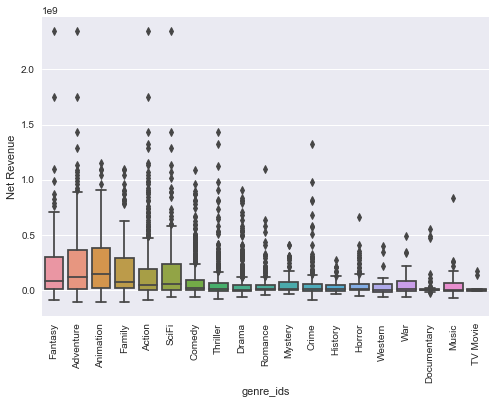

In [470]:
ax = sns.boxplot(x='genre_ids', y='Net Revenue', data=genre_df_exploded)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

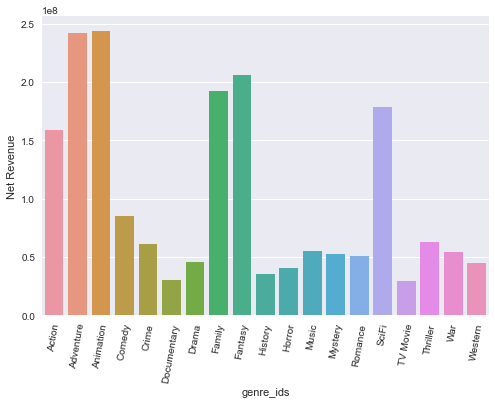

In [471]:
ax = sns.barplot(data=average_group, x='genre_ids', y='Net Revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

In [472]:
genre_df_exploded.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'id_y', 'release_date_y', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross',
       'Net Revenue'],
      dtype='object')

In [473]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)

In [474]:
genre_df_exploded['Year'] = genre_df_exploded['release_date_x'].dt.year

<ipython-input-474-78274f87bb1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df_exploded['Year'] = genre_df_exploded['release_date_x'].dt.year


In [475]:
genre_df2 = pd.merge(genre_df_exploded, movie_basics, left_on=['movie','Year'], right_on=['primary_title','start_year'], how='inner')

In [476]:
genre_df2

,Unnamed: 0,genre_ids,id_x,original_language,original_title_x,popularity,release_date_x,title,vote_average,vote_count,...,domestic_gross,worldwide_gross,Net Revenue,Year,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres
0,1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,217581232,494870992,329870992,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
1,1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,217581232,494870992,329870992,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
2,1,Animation,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,217581232,494870992,329870992,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
3,1,Family,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,217581232,494870992,329870992,2010,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
4,2,Adventure,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,312433331,621156389,451156389,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,25581,Horror,477577,en,3,1.816,2018-08-07,3,6.0,2,...,59774,295492,-6904508,2018,tt8558372,3,3,2018,17.0,Documentary
3814,25581,Mystery,477577,en,3,1.816,2018-08-07,3,6.0,2,...,59774,295492,-6904508,2018,tt5618160,3,3,2018,80.0,"Horror,Mystery,Thriller"
3815,25581,Mystery,477577,en,3,1.816,2018-08-07,3,6.0,2,...,59774,295492,-6904508,2018,tt8558372,3,3,2018,17.0,Documentary
3816,25581,Thriller,477577,en,3,1.816,2018-08-07,3,6.0,2,...,59774,295492,-6904508,2018,tt5618160,3,3,2018,80.0,"Horror,Mystery,Thriller"


In [477]:
runtime = genre_df2.groupby(['genre_ids'])['runtime_minutes'].mean().reset_index()
runtime

,genre_ids,runtime_minutes
0,Action,111.908397
1,Adventure,112.189922
2,Animation,94.776596
3,Comedy,101.221328
4,Crime,110.057292
5,Documentary,89.150943
6,Drama,109.748942
7,Family,98.957317
8,Fantasy,109.892617
9,History,119.574074


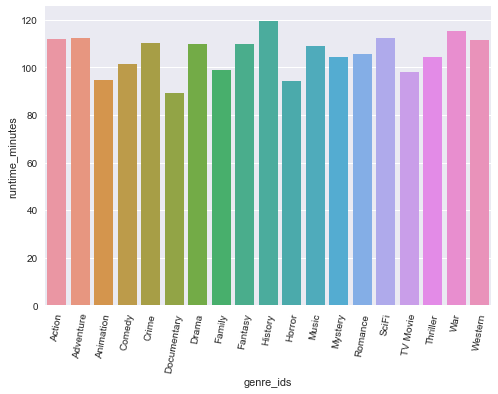

In [478]:
ax = sns.barplot(data=runtime, x='genre_ids', y='runtime_minutes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);